## Saving and Loading Models

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

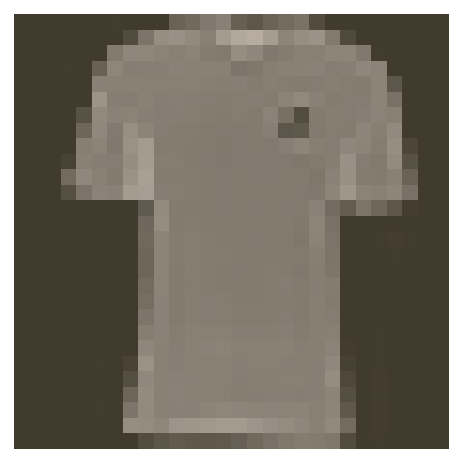

In [5]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

In [6]:
# Create the network, define the criterion and optimizer
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.677..  Test Loss: 0.976..  Test Accuracy: 0.631
Epoch: 1/2..  Training Loss: 1.062..  Test Loss: 0.758..  Test Accuracy: 0.710
Epoch: 1/2..  Training Loss: 0.851..  Test Loss: 0.690..  Test Accuracy: 0.734
Epoch: 1/2..  Training Loss: 0.804..  Test Loss: 0.626..  Test Accuracy: 0.763
Epoch: 1/2..  Training Loss: 0.715..  Test Loss: 0.617..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.692..  Test Loss: 0.594..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.660..  Test Loss: 0.584..  Test Accuracy: 0.779
Epoch: 1/2..  Training Loss: 0.706..  Test Loss: 0.578..  Test Accuracy: 0.788
Epoch: 1/2..  Training Loss: 0.658..  Test Loss: 0.547..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.603..  Test Loss: 0.547..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 0.680..  Test Loss: 0.534..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.622..  Test Loss: 0.532..  Test Accuracy: 0.805
Epoch: 1/2..  Training Loss: 0.641..  Test Loss: 0.5

### Saving and loading networks

As you can imagine, it's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.

In [8]:
print("Model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with `torch.save`. For example, we can save it to a file `'checkpoint.pth'`.

In [9]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with `torch.load`.

In [10]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [11]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different architecture, this fails.

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this, you build a dictionary with all the information you need to compeletely rebuild the model.

In [15]:
checkpoint = {
    'input_size': 784,
    'output_size': 10,
    'hidden_layers': [each.out_features for each in model.hidden_layers],
    'state_dict': model.state_dict()
}

torch.save(checkpoint, 'checkpoint.pth')

In [16]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(
        checkpoint['input_size'],
        checkpoint['output_size'],
        checkpoint['hidden_layers'],
    )
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [17]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
